In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [2]:
# membaca data

data = pd.read_excel('Data Skripsi 2023_2PCA.xlsx')
data

,Kab/Kota,PC1,PC2
0,Pacitan,1.632153,-2.304701
1,Ponorogo,-0.158697,-1.236645
2,Trenggalek,0.188841,-1.512638
3,Tulungagung,-0.923713,-0.867229
4,Blitar,-0.010199,-0.752552
5,Kediri,1.243439,0.048840
6,Malang,-0.056135,1.149632
7,Lumajang,0.898620,-1.157387
8,Jember,1.492339,0.251685
9,Banyuwangi,-0.628639,-0.850132


In [3]:
# mengambil fitur-fitur tertentu dalam data yang akan digunakan dalam perhitungan kmeans

clustering_data = data.iloc[:, 1:]

clustering_data

,PC1,PC2
0,1.632153,-2.304701
1,-0.158697,-1.236645
2,0.188841,-1.512638
3,-0.923713,-0.867229
4,-0.010199,-0.752552
5,1.243439,0.048840
6,-0.056135,1.149632
7,0.898620,-1.157387
8,1.492339,0.251685
9,-0.628639,-0.850132


In [4]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='random', n_init=1)
    kmeans.fit(clustering_data)
    wcss.append(kmeans.inertia_)
wcss

C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

[287.48574479845274,
 145.73841152057673,
 87.74099750909105,
 74.66918006722076,
 66.26810154650165,
 39.91966842423001,
 38.735817674118856,
 19.437879183722053,
 18.127991648636772,
 13.71976435921738]

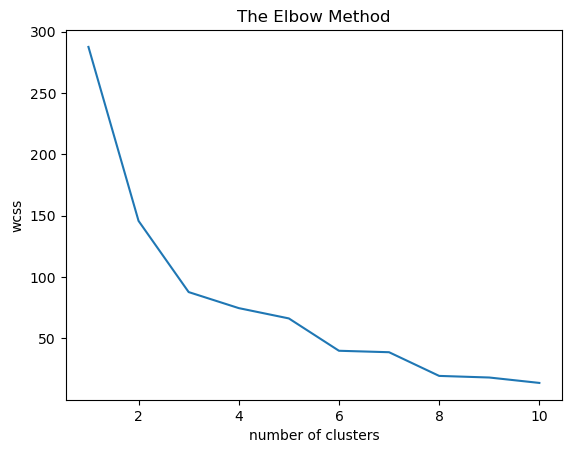

In [5]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [6]:
silhouette_scores = []

# Loop untuk menghitung silhouette score untuk setiap k
for k in range(2, 11):  # Mulai dari 2 karena silhouette score tidak didefinisikan untuk k=1
    kmeans = KMeans(n_clusters=k, init='random', n_init=1)
    cluster_labels = kmeans.fit_predict(clustering_data)
    score = silhouette_score(clustering_data, cluster_labels)
    silhouette_scores.append(score)
silhouette_scores

C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

[0.43055666987276914,
 0.4551602205718241,
 0.3730756954690207,
 0.3593176803302938,
 0.3931502567548527,
 0.31973577999835645,
 0.434114191908855,
 0.4507559175592018,
 0.40505837222067814]

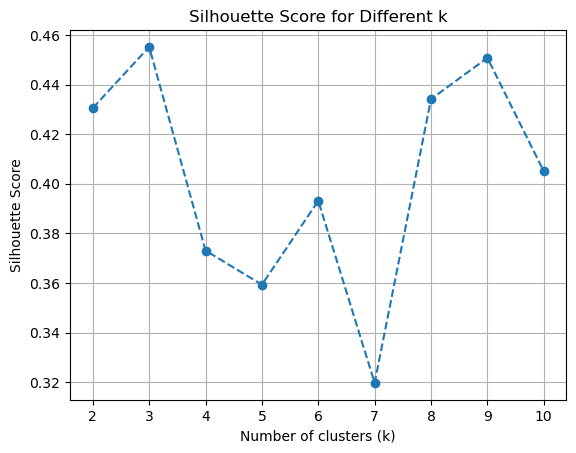

In [7]:
# Visualisasi Silhouette Score untuk tiap k
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Different k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [8]:
dbi = {}

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init='random', n_init=1)
    cluster_labels = kmeans.fit_predict(clustering_data)
    db_index = davies_bouldin_score(clustering_data, cluster_labels)
    dbi.update({k: db_index})
dbi

C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

{2: 0.892707447483724,
 3: 0.7474524396419272,
 4: 0.8795145552515733,
 5: 0.7399025583241509,
 6: 0.6005841409126557,
 7: 0.5664574445119438,
 8: 0.723156618165518,
 9: 0.6115426908903028,
 10: 0.6692099950770533}

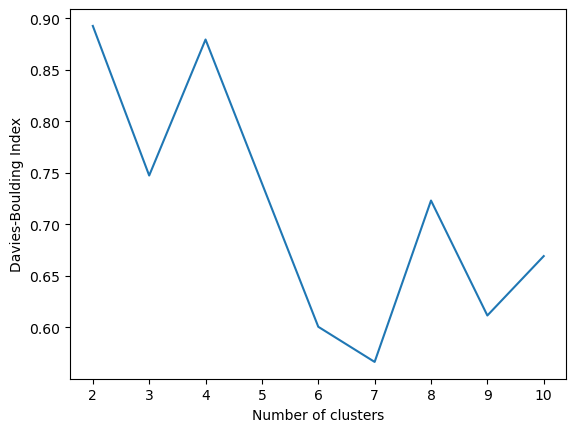

In [9]:
plt.plot(list(dbi.keys()), list(dbi.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

In [10]:
# Jalankan K-Means dengan centroid hybrid
# kmeans = KMeans(n_clusters=6, init='random', n_init=1, max_iter=100)
# kmeans.fit(clustering_data)

In [11]:
iterations = kmeans.n_iter_

sse_values = []

for i in range(iterations):
    kmeans = KMeans(n_clusters=7, init='random', n_init=1)
    kmeans.fit(clustering_data)
    centroids = kmeans.cluster_centers_
    sse = kmeans.inertia_  
    sse_values.append(sse)
    print(f'iter: {i} - first: {centroids[0]}, second: {centroids[1]}, SSE: {sse}')
    
print(f"Jumlah iterasi: ", iterations)

C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


iter: 0 - first: [4.49317106 1.11044833], second: [ 1.64886027 -1.30801568], SSE: 38.02979749588312
iter: 1 - first: [-0.25744336 -0.80222817], second: [ 1.62460931 -0.51093568], SSE: 22.298057907556142
iter: 2 - first: [ 1.55080678 -1.47021015], second: [1.66678218 0.03722116], SSE: 37.07040022296317


C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


iter: 3 - first: [-2.21996386 -0.49453904], second: [-4.08465047  2.03047173], SSE: 22.25404656842663
iter: 4 - first: [ 1.55080678 -1.47021015], second: [-1.56557568  2.09214025], SSE: 38.90170299389497
Jumlah iterasi:  5


C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kmeans.fit_predict(clustering_data)
clusters

C:\Users\Aisyah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,PC1,PC2,Cluster_Prediction
0,1.632153,-2.304701,3
1,-0.158697,-1.236645,1
2,0.188841,-1.512638,1
3,-0.923713,-0.867229,1
4,-0.010199,-0.752552,1
5,1.243439,0.048840,3
6,-0.056135,1.149632,4
7,0.898620,-1.157387,3
8,1.492339,0.251685,3
9,-0.628639,-0.850132,1
